In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
import matplotlib.pyplot as plt
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
from matplotlib import pyplot

import math
from datetime import datetime

In [47]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [48]:

df = pd.read_csv("C:/Users/thieu/Downloads/Data-Gold.csv",index_col='Date',parse_dates=True)

df.head(30)


,VND
Date,
2012-01-02,32202288.50
2012-01-03,33607538.00
2012-01-04,33923003.00
2012-01-05,33628569.00
2012-01-06,34000652.75
2012-01-09,33970717.50
2012-01-10,34406466.00
2012-01-11,34374352.25
2012-01-12,34939135.00


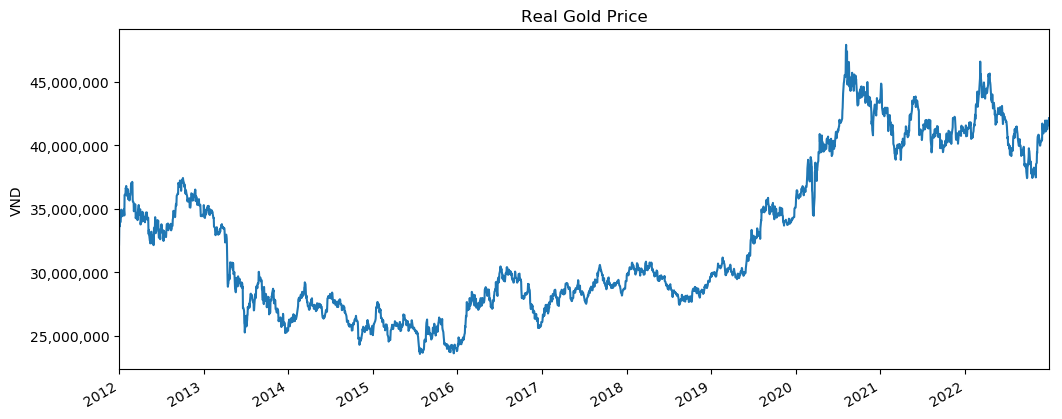

In [49]:
title = 'Real Gold Price'
ylabel='VND'
xlabel='' # we don't really need a label here

ax = df['VND'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [50]:
adf_test(df['VND'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -0.681541
p-value                    0.851473
# lags used               22.000000
# observations          2847.000000
critical value (1%)       -3.432649
critical value (5%)       -2.862556
critical value (10%)      -2.567311
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [51]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['VND'],k_diff=1)

# Equivalent to:
# df['d1'] = df1['VND'] - df1['VND'].shift(1)

adf_test(df['d1'],'Real Gold Price')

Augmented Dickey-Fuller Test: Real Gold Price
ADF test statistic     -1.256895e+01
p-value                 2.024078e-23
# lags used             2.100000e+01
# observations          2.847000e+03
critical value (1%)    -3.432649e+00
critical value (5%)    -2.862556e+00
critical value (10%)   -2.567311e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [52]:
len(df)

2870

In [53]:
from sklearn.model_selection import train_test_split 

# Splitting the dataset into 90% training data and 10% testing data.
train, test = train_test_split(df, test_size=.10, random_state=0,shuffle=False)


In [54]:
df = pd.concat([train, test],    # Combine vertically
                          ignore_index = True,
                          sort = False)
df.head(5)    

,VND,d1
0,32202288.50,NaN
1,33607538.00,1405249.50
2,33923003.00,315465.00
3,33628569.00,-294434.00
4,34000652.75,372083.75


In [55]:
auto_arima(train['VND'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2582
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -36338.203
Method:                       css-mle   S.D. of innovations         313239.885
Date:                Mon, 02 Jan 2023   AIC                          72684.405
Time:                        08:16:59   BIC                          72707.830
Sample:                             1   HQIC                         72692.896
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3188.3916   5162.252      0.618      0.537   -6929.437    1.33e+04
ar.L1.D.y      0.8876      0.082     10.856      0.000       0.727       1.048
ma.L1.D.y     -0.9059      0.075    -12.068      0.000      -1.053      -0.759
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1267           +0.0000j            1.1267            0.0000
MA.1            1.1038           +0.0000j            1.1038            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
model = ARIMA(train['VND'],order=(1,1,1))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.VND   No. Observations:                 2582
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -36338.203
Method:                       css-mle   S.D. of innovations         313239.885
Date:                Mon, 02 Jan 2023   AIC                          72684.405
Time:                        08:16:59   BIC                          72707.830
Sample:                    01-03-2012   HQIC                         72692.896
                         - 11-24-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3188.3916   5162.252      0.618      0.537   -6929.437    1.33e+04
ar.L1.D.VND     0.8876      0.082     10.856      0.000       0.727       1.048
ma.L1.D.VND    -0.9059      0.075    -12.068      0.000      -1.053      -0.759
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1267           +0.0000j            1.1267            0.0000
MA.1            1.1038           +0.0000j            1.1038            0.0000
-----------------------------------------------------------------------------
"""

In [57]:
# Obtain predicted values
start = len(train)
end  = len(train)+len(test)-1
pred = fitted.predict(start=start, end=end, dynamic=False,typ='levels')


In [58]:
# Compare predictions to expected values
for i in range(len(pred)):
    print(f"predicted={pred[i]}, expected={test['VND'][i]}")

predicted=40456017.093508005, expected=40546299.04
predicted=40475282.397533, expected=40840344.31
predicted=40492740.4187707, expected=40523204.39
predicted=40508594.322542086, expected=40948149.18
predicted=40523024.43538057, expected=40642813.75
predicted=40536190.81244958, expected=40127275.0
predicted=40548235.51634444, expected=40370843.12
predicted=40559284.63972318, expected=40953414.0
predicted=40569450.100563735, expected=41104653.5
predicted=40578831.23560768, expected=40902535.12
predicted=40587516.214677334, expected=40833686.25
predicted=40595583.29600265, expected=40889756.25
predicted=40603101.94043084, expected=41083645.12
predicted=40610133.80038234, expected=40886466.75
predicted=40616733.59763347, expected=40740850.5
predicted=40622949.902423404, expected=41287631.13
predicted=40628825.82497789, expected=41545464.13
predicted=40634399.62929557, expected=41190058.27
predicted=40639705.2779356, expected=41140553.13
predicted=40644772.91556305, expected=41162689.12
pre

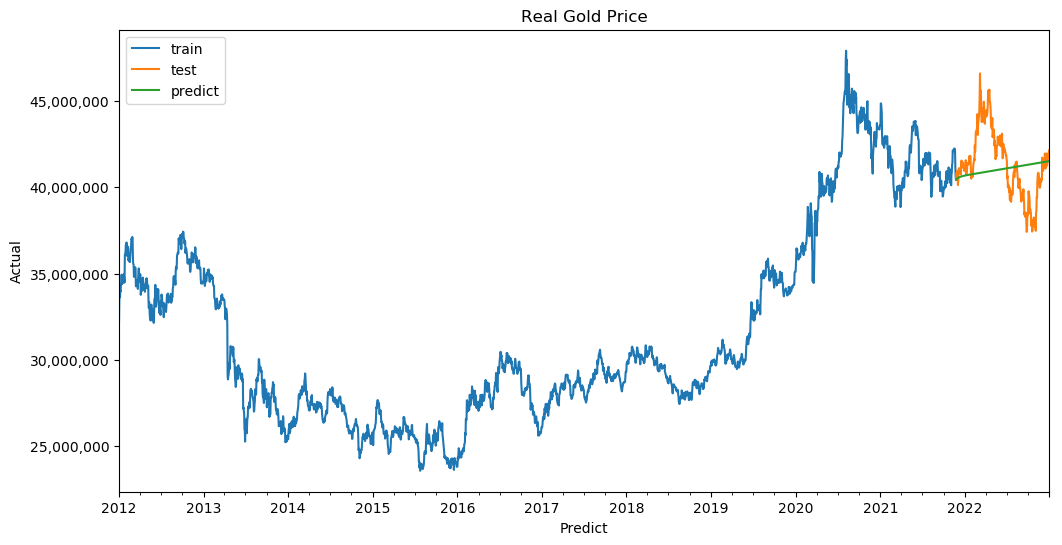

In [59]:
# Plot predictions against known values
title = 'Real Gold Price'
ylabel='Actual'
xlabel='Predict' # we don't really need a label here
pd=train['VND'].plot(legend=True,label='train')
ax = test['VND'].plot(legend=True,figsize=(12,6),title=title,label='test')
pred.plot(legend=True,label='predict')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [60]:
MSE = np.square(np.subtract(test['VND'],pred)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

2074521.9026960835


In [61]:
def mape(y_test, pred):
    y_test, pred = np.array(test['VND']), np.array(pred)
    mape = np.mean(np.abs((test['VND'] - pred) / test['VND']*100))
    return mape
print(mape(test['VND'],pred))

3.9400921075393693


In [62]:
len(df)

2870

In [63]:
model = ARIMA(df['VND'],order=(1,1,1))
fittin = model.fit()
fittin.summary()
forecast = fittin.predict(len(df),len(df)+30,typ='levels').rename('ARIMA(1,1,1) Forecast')
print(forecast)

2870    4.212931e+07
2871    4.212177e+07
2872    4.211562e+07
2873    4.211068e+07
2874    4.210680e+07
2875    4.210384e+07
2876    4.210169e+07
2877    4.210025e+07
2878    4.209942e+07
2879    4.209913e+07
2880    4.209932e+07
2881    4.209992e+07
2882    4.210088e+07
2883    4.210215e+07
2884    4.210370e+07
2885    4.210549e+07
2886    4.210749e+07
2887    4.210967e+07
2888    4.211202e+07
2889    4.211451e+07
2890    4.211712e+07
2891    4.211983e+07
2892    4.212264e+07
2893    4.212554e+07
2894    4.212850e+07
2895    4.213153e+07
2896    4.213461e+07
2897    4.213774e+07
2898    4.214091e+07
2899    4.214412e+07
2900    4.214736e+07
Name: ARIMA(1,1,1) Forecast, dtype: float64


In [74]:

fcast.to_csv(r'C:\Users\thieu\forecastt.csv')

In [ ]:
forecast.to_csv("c:/Users/ARIMA.csv")

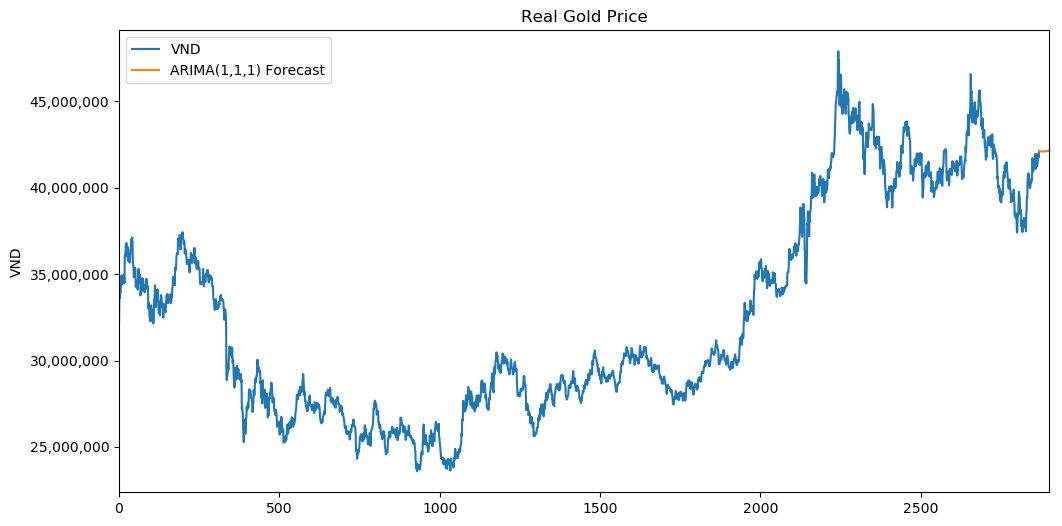

In [64]:
# Plot predictions against known values
title = 'Real Gold Price'
ylabel='VND'
xlabel='' # we don't really need a label here
ax = df['VND'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);